In [1]:
#Import the neccassary libraries. 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Import the excel file.
pol_data = pd.ExcelFile('Project Pollinator Count Data Collection Sheet 2022.xlsx')

#Select the sheet of interest and create a dataframe based off the sheet. 
df_pol_sh1 = pd.read_excel(pol_data, 'Summer 2022 Pollinator Data Col')

In [126]:
#Showing what our dataset looks like. 
df_pol_sh1.replace('total_shade', 'full_shade', inplace=True)

In [127]:
#Showing what our dataset looks like. 
df_pol_sh1

,sample_date,collector_name,location,location_number,"time_code (M,A,E)",sample_start,sample_end,weather,wind (km/hr),air_temp(C°),...,plant_species,plant_color,plant_pattern,Photo reference #,Notes (additional observations),Unnamed: 26,name_primary,name_secondary,final,binned_week
0,2022-07-08,"Keegan, Parsa",Library,L4,E,14:02:00,14:26:00,cloudy,13,21,...,coronaria,pink,solid,NaN,NaN,NaN,Liz,NaN,Liz,"(2022-07-03, 2022-07-10]"
1,2022-06-29,"Jen,Aldona",Student_Union,S2,M,10:47:00,11:12:00,cloudy,12,17,...,rigida,purple,solid,NaN,NaN,NaN,Liz,NaN,NaN,"(2022-06-26, 2022-07-03]"
2,2022-06-29,"Jen,Aldona",Student_Union,S2,M,10:47:00,11:12:00,cloudy,12,17,...,syleatica,blue,striped,NaN,NaN,NaN,Liz,NaN,NaN,"(2022-06-26, 2022-07-03]"
3,2022-06-29,"Jen,Aldona",Student_Union,S2,M,10:47:00,11:12:00,cloudy,12,17,...,spp,purple,solid,NaN,NaN,NaN,Liz,NaN,NaN,"(2022-06-26, 2022-07-03]"
4,2022-06-29,"Jen,Aldona",Student_Union,S2,M,10:47:00,11:12:00,cloudy,12,17,...,rigida,purple,solid,NaN,NaN,NaN,Liz,NaN,NaN,"(2022-06-26, 2022-07-03]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1929,2022-06-07,"Liz,Dave",Student_Union,S1,E,16:41:00,17:06:00,overcast,5,18,...,raphanistrum,white,striped,NaN,NaN,NaN,Liz,NaN,NaN,"(2022-06-05, 2022-06-12]"
1930,2022-06-07,"Liz,Dave",Student_Union,S1,E,16:41:00,17:06:00,overcast,5,18,...,raphanistrum,white,striped,NaN,hornet,NaN,Liz,NaN,NaN,"(2022-06-05, 2022-06-12]"
1931,2022-06-01,"David,Jen,Aldona",Library,L1,M,11:53:00,12:17:00,overcast,6,19,...,maculatum,pink,solid,NaN,slender wasp,NaN,David,Liz,Keegan,"(2022-05-29, 2022-06-05]"
1932,2022-06-01,"David,Jen,Aldona",Library,L1,M,11:53:00,12:17:00,overcast,6,19,...,maculatum,pink,solid,NaN,paper wasp,NaN,David,Liz,Keegan,"(2022-05-29, 2022-06-05]"


In [128]:
#Make a function that makes a dict of column names and their associated index from an inputed dataframe. 
def Dict_of_column_NameIndex(dataframe):
    
    column_names = []
    column_index = []

    for name in dataframe.columns: 
        column_names.append(name)
    
    for name in dataframe.columns:
        column_index.append(dataframe.columns.get_loc(name)) 
    
    dict_column_index = dict(zip(column_names, column_index))

    return dict_column_index

In [129]:
#Run the function to create a dict. 
dict_column_index = Dict_of_column_NameIndex(df_pol_sh1)

#Print the dict in an alligned format. 
for key, value in dict_column_index.items():
    print('{: >35} {: >3}'.format(key, value))

                        sample_date   0
                     collector_name   1
                           location   2
                    location_number   3
                  time_code (M,A,E)   4
                       sample_start   5
                         sample_end   6
                            weather   7
                       wind (km/hr)   8
                       air_temp(C°)   9
                     shade_coverage  10
                     observation_id  11
                         pollinator  12
                       insect_order  13
                      insect_family  14
                       insect_genus  15
                     insect_species  16
                         plant_host  17
                        plant_order  18
                       plant_family  19
                        plant_genus  20
                      plant_species  21
                        plant_color  22
                      plant_pattern  23
                  Photo reference #  24


Figure 1: This figure takes the percentage difference of both the average number of visitations of pollinators and the mean temperature for each 7 day period from June 12 to Sept 11th. 

Mean visitionsation: Calucalted for each week by taking the total number of visitation for that week and dividing it 
by the total number of survey locations that were sampled in that week and does that for each week. 

Mean Temperature: Calulated by adding all the temperatures for a week together and then dividing it by the number of visitations. 

In [207]:
#Creating bins, each bin will be a week starting on May 16, 2022, and going for 18 weeks. 
bins = pd.date_range(start='2022-05-15', freq='1W', periods=18)

#Creating A column with the binned categorization. 
df_pol_sh1['binned_week'] = pd.cut(df_pol_sh1['sample_date'], bins = bins)

#Creating series weekly bins, with each bin having an average of the total pollinator 
#visitation for each week, divided by the total number locations that were surveyed for each week.
series_mean = df_pol_sh1['binned_week'].value_counts() / df_pol_sh1.groupby('binned_week')['location_number'].nunique()

#Gets the mean temperature per week and turns it into a series. 
series_mean_temp = df_pol_sh1.groupby('binned_week')['air_temp(C°)'].mean()

In [208]:
# A function that intakes a df column and returns a list of the percent differences with the first value being 
#the baseline percentage of 100.

def turn_into_percent_difference(old_series):
    initial_value = old_series[0]
    new_list = []
    for index in old_series:
        new_list.append((index/ initial_value)*100)
    return new_list

In [209]:
# Conveting the series into dataframes and while not including the first 4 weeks. 

df_mean = pd.DataFrame(series_mean)
df_mean_temp = pd.DataFrame(series_mean_temp)
df_mean_temp

,air_temp(C°)
binned_week,
"(2022-05-15, 2022-05-22]",12.500000
"(2022-05-22, 2022-05-29]",15.138889
"(2022-05-29, 2022-06-05]",18.984615
"(2022-06-05, 2022-06-12]",16.827068
"(2022-06-12, 2022-06-19]",16.782051
"(2022-06-19, 2022-06-26]",20.341463
"(2022-06-26, 2022-07-03]",22.621053
"(2022-07-03, 2022-07-10]",19.560440
"(2022-07-10, 2022-07-17]",23.347826


In [210]:
# Converting the values in the two previous dataframe into percent differences and adding these values to a df. 

df_mean['Abundance_percentage'] = turn_into_percent_difference(df_mean[0])
df_mean['Temp_percentage'] = turn_into_percent_difference(df_mean_temp['air_temp(C°)'])

#Dropping the original mean column. 

df_mean = df_mean.drop(0, axis=1)

#Adding a new index column that is a single data format instead of a data range and 
# converting it to a string of Mon, day, year format. 

df_mean['date'] = bins[1:]
df_mean.set_index(["date"],inplace=True)
df_mean.index = df_mean.index.strftime("%b %d, %Y")

In [211]:
df_mean

,Abundance_percentage,Temp_percentage
date,,
"May 22, 2022",100.00,100.000000
"May 29, 2022",225.00,121.111111
"Jun 05, 2022",406.25,151.876923
"Jun 12, 2022",831.25,134.616541
"Jun 19, 2022",975.00,134.256410
"Jun 26, 2022",512.50,162.731707
"Jul 03, 2022",1187.50,180.968421
"Jul 10, 2022",568.75,156.483516
"Jul 17, 2022",1437.50,186.782609


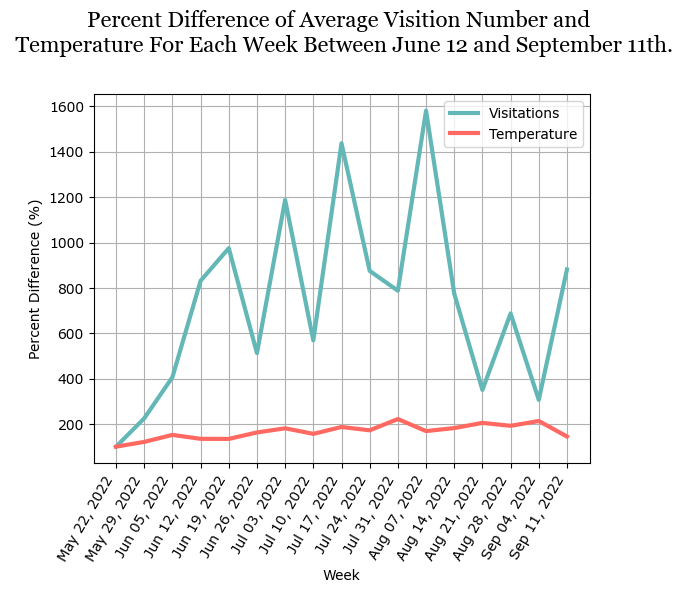

In [213]:
#Plotting both percentage difference of visitations and temperature of weeks. 

fig, ax = plt.subplots()
ax.plot(df_mean.index, df_mean['Abundance_percentage'], linewidth=3, color='#63B7B7')
ax.plot(df_mean.index, df_mean['Temp_percentage'], linewidth=3, color='#FF6961')
plt.xticks(rotation = 60, horizontalalignment='right')
ax.legend(['Visitations', 'Temperature'])
ax.set_ylabel('Percent Difference (%)')
ax.set_xlabel('Week')
ax.set_title('Percent Difference of Average Visition Number and \n Temperature For Each Week Between June 12 and September 11th.',
             fontname = 'Georgia', 
             fontsize= 16, 
             pad=30)
ax.grid()
#ax.tick_params(axis='both', length = 10, width = 2)
#yticks = np.linspace(0, 220, num=12)
#ax.set_yticks(yticks)
plt.show()

In [174]:
df_shade_pol_abundance_less24= df_pol_sh1[df_pol_sh1['air_temp(C°)'] < 24]
df_shade_pol_abundance_less24 = pd.DataFrame(df_shade_pol_abundance_less24.groupby('location')[['shade_coverage', 'location']].value_counts())
df_shade_pol_abundance_less24

0
location         shade_coverage     
Community_Garden no_shade        170
                 partly_shade    155
                 full_shade      112
                 mostly_shade     64
Library          partly_shade    146
                 no_shade         87
                 mostly_shade     81
Student_Union    no_shade        531
                 mostly_shade     40

In [181]:
df_shade_pol_abundance_greatEqual24= df_pol_sh1[df_pol_sh1['air_temp(C°)'] >= 24]
df_shade_pol_abundance_greatEqual24 = pd.DataFrame(df_shade_pol_abundance_greatEqual24.groupby('location')[['shade_coverage', 'location']].value_counts(dropna=False))
df_shade_pol_abundance_greatEqual24

0
location         shade_coverage     
Community_Garden partly_shade    145
                 no_shade         77
                 mostly_shade     36
                 full_shade       22
Library          partly_shade     41
                 mostly_shade     39
                 no_shade          2
Student_Union    no_shade        186

In [203]:
df_shade_pol_abundance_greatEqual24 = df_shade_pol_abundance_greatEqual24.unstack()
df_shade_pol_abundance_less24 = df_shade_pol_abundance_less24.unstack()
df_shade_pol_abundance_less24 = df_shade_pol_abundance_less24.fillna(0)
#pd.DataFrame(df_shade_pol_abundance_less24)

location       Community_Garden                                       Library  \
shade_coverage       full_shade mostly_shade no_shade partly_shade full_shade   
0                         112.0         64.0    170.0        155.0        0.0   

location                                          Student_Union               \
shade_coverage mostly_shade no_shade partly_shade    full_shade mostly_shade   
0                      81.0     87.0        146.0           0.0         40.0   

location                              
shade_coverage no_shade partly_shade  
0                 531.0          0.0

<Axes: xlabel='location'>

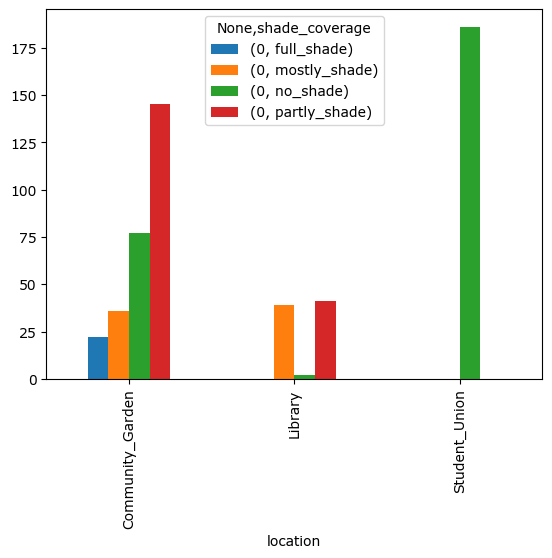

In [196]:
df_shade_pol_abundance_greatEqual24.plot(kind='bar')

<Axes: >

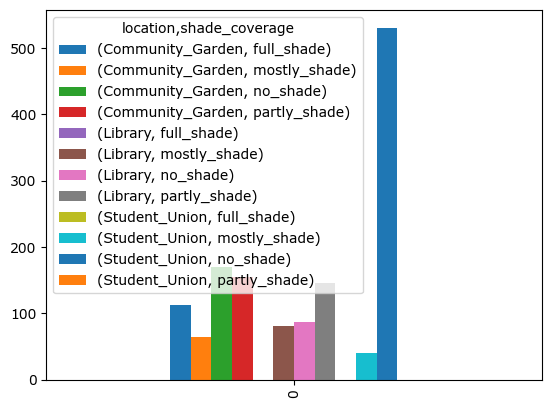

In [197]:
df_shade_pol_abundance_less24.plot(kind='bar')

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.bar(df_shade_pol_abundance_greatEqual24.index, df_shade_pol_abundance_greatEqual24['shade_coverage'])
#ax1.bar(df_mean.index, df_mean['Abundance_percentage'], linewidth=3, color='#63B7B7')
#df_shade_pol_abundance_greatEqual24.plot(kind='bar')